In [1]:
!pip install ucimlrepo

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch.nn as nn
import torch
import torch.optim as optim
from tqdm import tqdm
tqdm.pandas()
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [4]:
# variable information
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
# Convert to pandas datafrane
df_50k = pd.concat([X, y], axis=1)

In [6]:
df_50k

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
df_50k.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning & Preprocessing

In [8]:
# Drop unneccesary variables
df_50k = df_50k.drop(columns=['fnlwgt', 'education-num', 'relationship', 'capital-gain', 'capital-loss'])

In [9]:
for col in df_50k:
    print(col)
    print(df_50k[col].unique(), "\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89] 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan] 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan] 

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Es

In [10]:
# Convert '?' to NaN in the DataFrame
df_50k = df_50k.replace('?', pd.NA)

In [11]:
df_50k.isna().sum()

,0
age,0
workclass,2799
education,0
marital-status,0
occupation,2809
race,0
sex,0
hours-per-week,0
native-country,857
income,0


In [12]:
df_50k.isna().any(axis=1).sum()

3620

In [13]:
# Drop all rows that contain NA values
df_50k = df_50k.dropna().reset_index(drop=True)

In [14]:
for col in df_50k:
  print(df_50k[col].value_counts(normalize=True), "\n")

age
36    0.028371
33    0.028283
31    0.028172
35    0.028128
23    0.027442
        ...   
88    0.000111
85    0.000111
86    0.000022
89    0.000022
87    0.000022
Name: proportion, Length: 74, dtype: float64 

workclass
Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: proportion, dtype: float64 

education
HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.043320
11th            0.035801
Assoc-acdm      0.033324
10th            0.027044
7th-8th         0.018199
Prof-school     0.017359
9th             0.014948
12th            0.012759
Doctorate       0.012030
5th-6th         0.009929
1st-4th         0.004909
Preschool       0.001592
Name: proportion, dtype: float64 

marital-status
Married-civ-spouse       0.465592
Never-married            0.322807
Divorced

In [15]:
# Get rid of overly detailed values and fix typos

# Define mappings for each column
mappings = {
    "workclass": {
        "Self-emp-not-inc": "Self Employed",
        "Self-emp-inc": "Self Employed",
        "Local-gov": "Government",
        "State-gov": "Government",
        "Federal-gov": "Government"
    },
    "education": {
        "Masters": "Graduate Degree",
        "Prof-school": "Graduate Degree",
        "Doctorate": "Graduate Degree",
        "Assoc-voc": "Associate Degree",
        "Assoc-acdm": "Associate Degree",
        "11th": "Didn't Graduate",
        "10th": "Didn't Graduate",
        "9th": "Didn't Graduate",
        "7th-8th": "Didn't Graduate",
        "12th": "Didn't Graduate",
        "5th-6th": "Didn't Graduate",
        "1st-4th": "Didn't Graduate",
        "Preschool": "Didn't Graduate"
    },
    "marital-status": {
        "Married-civ-spouse": "Married",
        "Married-spouse-absent": "Separated",
        "Married-AF-spouse": "Married"
    },
    "native-country": {
        "Outlying-US(Guam-USVI-etc)": "United-States"
    },
    "income": {
        ">50K.": ">50K",
        "<=50K.": "<=50K"
    }
}

# Apply mappings using a loop
for column, mapping in mappings.items():
    df_50k[column] = df_50k[column].replace(mapping)

In [16]:
# Change all countries other than America to "Other"
df_50k["native-country"] = df_50k["native-country"].apply(lambda x: "Other" if x != "United-States" else x)

# Modeling

In [17]:
# Convert binary categorical variables to numerical values

mappings = {
    "sex": {"Male": 0, "Female": 1},
    "native-country": {"United-States": 0, "Other": 1},
    "income": {"<=50K": 0, ">50K": 1}
}

# Apply the mappings to the DataFrame
for column, mapping in mappings.items():
    df_50k[column] = df_50k[column].map(mapping)

In [18]:
# One-hot encode categorical variables with more than 2 categories
categorical_cols = ['workclass', "education", "marital-status", 'occupation', "race"]
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = one_hot_encoder.fit_transform(df_50k[categorical_cols]).toarray()
df_50k = pd.concat([df_50k, pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(categorical_cols))], axis=1)
df_50k.drop(categorical_cols, axis=1, inplace=True)

In [19]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'hours-per-week']
df_50k[numerical_cols] = scaler.fit_transform(df_50k[numerical_cols])

In [20]:
# Split data into training and testing sets
X = df_50k.drop('income', axis=1).values
y = df_50k['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
class IncomeDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create datasets
train_dataset = IncomeDataset(X_train, y_train)
test_dataset = IncomeDataset(X_test, y_test)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Output layer for binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Sigmoid activation for binary output
        return x

# Initialize the model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

In [23]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [25]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for features, labels in tqdm(train_loader):
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

100%|██████████| 1131/1131 [00:03<00:00, 322.71it/s]


Epoch [1/10], Loss: 0.3100


100%|██████████| 1131/1131 [00:02<00:00, 523.02it/s]


Epoch [2/10], Loss: 0.2316


100%|██████████| 1131/1131 [00:02<00:00, 407.59it/s]


Epoch [3/10], Loss: 0.3219


100%|██████████| 1131/1131 [00:03<00:00, 326.52it/s]


Epoch [4/10], Loss: 0.7358


100%|██████████| 1131/1131 [00:02<00:00, 476.02it/s]


Epoch [5/10], Loss: 0.2772


100%|██████████| 1131/1131 [00:02<00:00, 488.26it/s]


Epoch [6/10], Loss: 0.2023


100%|██████████| 1131/1131 [00:02<00:00, 534.80it/s]


Epoch [7/10], Loss: 0.2341


100%|██████████| 1131/1131 [00:02<00:00, 495.31it/s]


Epoch [8/10], Loss: 0.6123


100%|██████████| 1131/1131 [00:02<00:00, 388.48it/s]


Epoch [9/10], Loss: 0.2320


100%|██████████| 1131/1131 [00:02<00:00, 543.64it/s]

Epoch [10/10], Loss: 0.2171



Model Evaluation Results:
Test Loss: 0.3510
Accuracy: 0.8346
Precision: 0.6886
Recall: 0.6383
F1 Score: 0.6625

Confusion Matrix:


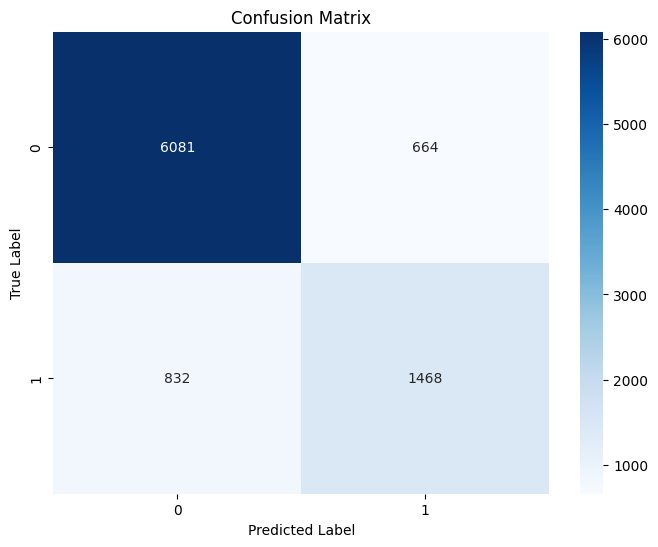

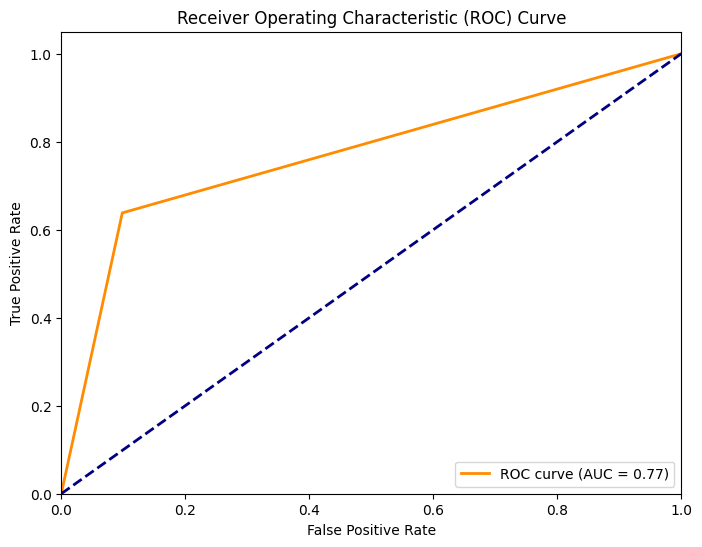


Per-class Analysis:
Class 0 Accuracy: 0.9016
Class 1 Accuracy: 0.6383


In [28]:
def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set the model to evaluation mode

    # Initialize lists to store predictions and true labels
    all_predictions = []
    all_labels = []
    test_loss = 0

    # Disable gradient calculations for evaluation
    with torch.no_grad():
        for features, labels in test_loader:
            # Forward pass
            outputs = model(features).squeeze()

            # Calculate loss
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Convert outputs to predictions (0 or 1)
            predicted = (outputs > 0.5).float()

            # Store predictions and labels
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert lists to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    # Calculate average test loss
    avg_test_loss = test_loss / len(test_loader)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    return {
        'test_loss': avg_test_loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'predictions': all_predictions,
        'true_labels': all_labels
    }

def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_metrics_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main evaluation code
def main_evaluation():
    # Evaluate the model
    eval_results = evaluate_model(model, test_loader, criterion)

    # Print metrics
    print("\nModel Evaluation Results:")
    print(f"Test Loss: {eval_results['test_loss']:.4f}")
    print(f"Accuracy: {eval_results['accuracy']:.4f}")
    print(f"Precision: {eval_results['precision']:.4f}")
    print(f"Recall: {eval_results['recall']:.4f}")
    print(f"F1 Score: {eval_results['f1_score']:.4f}")

    # Plot confusion matrix
    print("\nConfusion Matrix:")
    plot_confusion_matrix(eval_results['confusion_matrix'])

    # Calculate and plot ROC curve
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(eval_results['true_labels'], eval_results['predictions'])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Per-class analysis
    print("\nPer-class Analysis:")
    for i in range(2):
        class_mask = eval_results['true_labels'] == i
        class_accuracy = accuracy_score(
            eval_results['true_labels'][class_mask],
            eval_results['predictions'][class_mask]
        )
        print(f"Class {i} Accuracy: {class_accuracy:.4f}")

    return eval_results

# Example usage
if __name__ == "__main__":
    # Assuming model, test_loader, and criterion are already defined
    eval_results = main_evaluation()

    # You might want to save the model and results
    torch.save(model.state_dict(), 'income_classifier.pth')

    # Save evaluation metrics to a file
    with open('evaluation_results.txt', 'w') as f:
        for key, value in eval_results.items():
            if isinstance(value, (int, float)):
                f.write(f"{key}: {value}\n")